# Síntesis de funciones de excitación no disipativas
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
En este documento se presentan algunas de las capacidades que posee el módulo PyTC2 para operar con cuadripolos. Se muestran ejemplos de cómo definir redes y sus modelos Z, Y y $T_{ABCD}$ asociados, como también algunas redes que implementan dichos modelos.

* Funciones de dibujo de redes: [dibujar_Pi](), [dibujar_Tee]()
* Funciones de conversión y definición de cuadripolos: [Z2Tabcd_s](), [Y2Tabcd_s](), [TabcdY_s](), [TabcdZ_s](), [TabcdLZY_s](), 
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


### Introducción

Una función de excitación que representa una inmitancia (una impedancia ó admitancia) $F(s)$ será no disipativa si cumple que:

* $F$ sea una función real positiva (FRP)
* $\Re \{F\}=0$

La primer condición es necesaria para que la inmitancia sea realizable, y se refiere al apéndice E del libro de Santiago Cogollos Borrás para más detalles. La segunda restricción implica que 

$$ F = \frac{m_1}{n_2} \lor  F = \frac{n_1}{m_2} $$

siendo $m$ la parte par y $n$ la parte impar de sendos polinomios numerador y denominador (sub. 1 y 2 respect.). Luego queda definir la forma propuesta por Foster en [*A reactance theorem*](https://en.wikipedia.org/wiki/Foster%27s_reactance_theorem) del año 1924:

$$ F(s)=\frac{P(s)}{Q(s)} = \frac{k_0}{s} + k_\infty.s + \sum_{i=1}^N\frac{2.k_i.s}{s^2+\omega_i^2} $$

donde la inmitancia F puede representarse como una suma de términos, o fracciones simples, que individualmente están asociandas a cada elemento circuital de la red. Teniendo la función $F(s)$ N polos finitos, la red resultante de la expansión Foster tendrá $2.N + 2$ componentes. Es decir, los residuos $k$ serán los valores de los componentes, como se observa que $k_0$ y $k_\infty$ serán sendos capacitor e inductor, mientras que cada polo finito cuyo residuo es $k_i$, se asocian a tanques resonantes L-C. Justamente la frecuencia de resonancia de cada tanque será $\omega_i$. En los ejemplos siguientes quedará evidenciada esta asociación.


In [1]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.sintesis_dipolo import foster
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s


In [2]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
FF = (2*s**4 + 20*s**2 + 18)/(s**3 + 4*s)

print_latex(a_equal_b_latex_s('F(s)', FF))


<IPython.core.display.Math object>

In [3]:
# Se expande FF a la Foster
k0, koo, ki_wi, FF_foster = foster(FF)

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1 = \left[\left[ \frac{\omega_1^2}{2k_1}, \frac{1}{2k_1} \right]\right]', ki_wi ))

print_latex(a_equal_b_latex_s('k_\infty', koo))


print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], FF_foster ))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Luego queda solo implementar la inmitancia como impedancia o admitancia. Para ello se dispone de funciones de dibujo de redes:

#### Foster serie

<IPython.core.display.Math object>

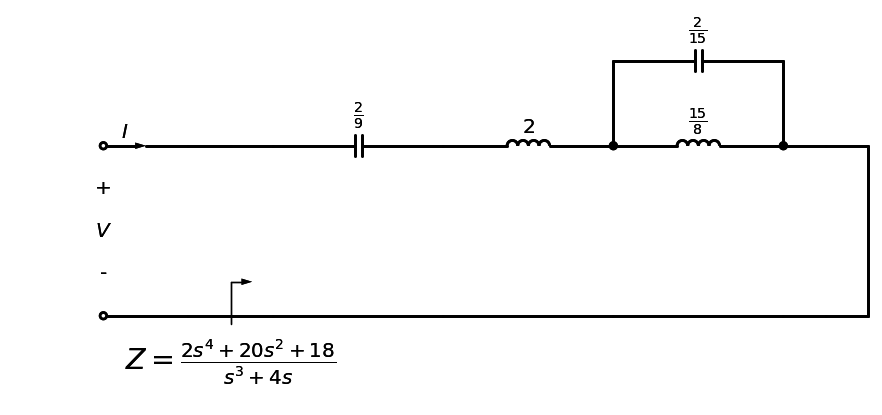

In [4]:
print_subtitle('Foster serie')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)=F(s)', FF)[1:-1], FF_foster ))

# Tratamos a nuestra función imitancia como una Z
dibujar_foster_serie(k0, koo, ki_wi, z_exc = FF)




Como se puede ver, la suma de términos simples, resulta en que cada término será una impedancia asociada en serie. Luego si se asume F(s) como admitancia Y(s), la red resultante estará asociada en paralelo.

#### Foster derivación

<IPython.core.display.Math object>

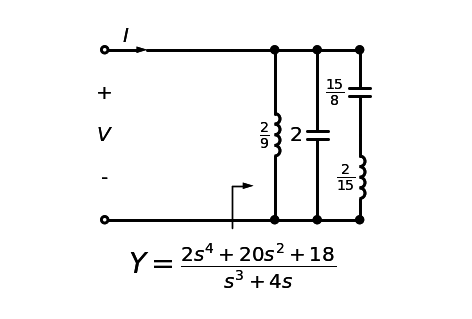

In [5]:
print_subtitle('Foster derivación')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)=F(s)', FF)[1:-1], FF_foster ))

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = FF)



Como puede verse, el método de Foster da lugar a redes con $2.1 + 2 = 4$ componentes reactivos en ambos casos. Se dice que es un método **canónico** dado que esa es la menor cantidad de componentes con la que la función F(s) puede ser implementada con elementos pasivos.
